In [1]:
%config InlineBackend.figure_format = 'svg' # change output plot display format to 'svg'

# import the required modules for this notebook
import numpy
import matplotlib.pyplot as plt

# import the helper functions from the parent directory,
# these help with things like graph plotting and notebook layout
import sys
sys.path.append('..')
from helper_functions import *

# set things like fonts etc - comes from helper_functions
set_notebook_preferences()

# add a show/hide code button - also from helper_functions
toggle_code(title = "import functions", above = 1)

## 4.2 High dimensional PCA

In [section 4.1](dim_red_pca.ipynb) we applied PCA to the toy $2$D dataset and a subset of MNIST containing only $8$'s. Performing PCA amounted to solving an eigenproblem of the form $\mathbf{S} \mathbf{u}_d = \lambda_d\mathbf{u}_d$. One issue we have not yet addressed is the computational performance of this method. The complexity of an eigenproblem involving a matrix with dimensions $D \times D$ is $\mathcal{O}(D^3)$. In the PCA eigenproblem, the dimension of $\mathbf{S}$ is the number of dimensions of the dataset: $D = 2$ for the $2$D example and $D = 784$ for MNIST. Because the computational complexity is polynomial with $D$, PCA quickly becomes prohibitively slow for high-dimensional datasets. Consider for example a dataset consisting of $1000$ coloured images of $1,920 \times 1,200$ pixels each. This comes up to $\approx 7 \times 10^6$ dimensions, which would take a factor of $\approx 6.8 \times 10^{11}$ more computational time to run than our MNIST example.

In this section we introduce a neat trick calculation which changes the computational complexity from $\mathcal{O}(D^3)$ to $\mathcal{O}(N^3)$ where $N$ is the number of samples in the dataset. Applied to the high-resolution images example above, this trick would reduce the computational time by a factor of $\approx 3 \times 10^8$. Note that this method would be useful onyl when $N < D$, but there are several situations where this might be the case. Another example could be a dataset of $500$ audio samples, each $3$ seconds in duration and a standard sampling rate of $44.1$kHz. Then $D = 44.1 \times 10^3 \times 3 = 132300$ and $N = 1000$. Implementing the $\mathcal{O}(D^3)\to \mathcal{O}(N^3)$ trick would reduce computation time by a factor of $\approx 2 \times 10^7$.

As a reminder, the PCA eigenproblem is:

\begin{align}
\mathbf{S} \mathbf{u}_d = \lambda_d\mathbf{u}_d, \text{ where } \mathbf{S} = \frac{1}{N}\sum^N_{n = 1}(\mathbf{x}_n - \bar{\mathbf{x}})(\mathbf{x}_n - \bar{\mathbf{x}})^\top. \\
\end{align}

Defining $\mathbf{X}$ as the matrix whose $n^{th}$ row is $(\mathbf{x}_n - \bar{\mathbf{x}})$, the above expression can be rewritten in the form:

\begin{align}
\mathbf{S} \mathbf{u}_d = \frac{1}{N}\mathbf{X}^\top \mathbf{X} \mathbf{u}_d = \lambda_d \mathbf{u}_d\\
\end{align}

The trick then amounts to premultiplying both sides by $\mathbf{X}$, to obtain another eigenproblem:

\begin{align}
\frac{1}{N}\mathbf{X} \mathbf{X}^\top \mathbf{X} \mathbf{u}_d &= \lambda_d \mathbf{X} \mathbf{u}_d\\
~\\
\frac{1}{N}\mathbf{X} \mathbf{X}^\top \mathbf{v}_d &= \lambda_d \mathbf{v}_d\\
\end{align}

where $\mathbf{v}_d = \mathbf{X} \mathbf{u}_d$. The relevant matrix is now $\mathbf{X} \mathbf{X}^\top$ which has dimensons $N \times N$ instead of $\mathbf{X}^\top \mathbf{X}$ which has dimensons $D \times D$. Also note that the two eigenproblems share the same eigenvalues $\lambda_d$. Once this modified eigenproblem is solved, the last step is to obtain $\mathbf{u}_d$ from $\mathbf{v}_d$, which can be achieved straightfowardly after premultiplying by $\mathbf{X}^\top$ and some manipulation:

\begin{align}
\boxed{\mathbf{u}_d = \frac{1}{\sqrt{N\lambda_d}} \mathbf{X}^\top \mathbf{v}_d}
\end{align}

where we have assumed $\mathbf{v}_d$ is normalised, and have rescaled $\mathbf{u}_d$ so as to normalise it as well.

<details>
<summary>From $\mathbf{v}_d$ to $\mathbf{u}_d$ in detail</summary>
<div>

\begin{align}
\frac{1}{N}\mathbf{X} \mathbf{X}^\top \mathbf{v}_d &= \lambda_d \mathbf{v}_d\\
~\\
\frac{1}{N}\mathbf{X}^\top \mathbf{X} \mathbf{X}^\top \mathbf{v}_d &= \lambda_d \mathbf{X}^\top \mathbf{v}_d\\
~\\
\frac{1}{N}\mathbf{X}^\top \mathbf{X} \mathbf{X}^\top \mathbf{v}_d &= \lambda_d \mathbf{X}^\top \mathbf{X} \mathbf{u}_d\\
~\\
\frac{1}{N} \mathbf{X}^\top \mathbf{v}_d &= \lambda_d \mathbf{u}_d\\
~\\
\mathbf{u}_d &= \frac{1}{N \lambda_d }\mathbf{X}^\top \mathbf{v}_d\\
\end{align}

Assuming $\mathbf{v}_d$ is normalised:

\begin{align}
\mathbf{u}_d &= \frac{1}{N \lambda_d }\mathbf{X}^\top \mathbf{v}_d\\
~\\
|\mathbf{u}_d|^2 &= \frac{1}{N^2 \lambda_d^2 }\mathbf{v}_d^\top \mathbf{X}\mathbf{X}^\top \mathbf{v}_d\\
~\\
|\mathbf{u}_d|^2 &= \frac{1}{N \lambda_d }|\mathbf{v}_d|^2 = \frac{1}{N \lambda_d }\\
\end{align}

Therefore to obtain normalised $\mathbf{u}_d$, we must rescale $1/(N \lambda_d) \mathbf{X}^\top \mathbf{v}_d$ by $\sqrt{N \lambda_d }$, to obtain the result

\begin{align}
\mathbf{u}_d &= \frac{1}{\sqrt{N \lambda_d}}\mathbf{X}^\top \mathbf{v}_d\\
\end{align}

</div>
</details>

The implementation of this approach is very similar to our previous method:

In [12]:
def PCA_D(x):
    
    X = (x - x.mean(axis = 0))
    
    t = time.time()
    eig_values, eig_vectors = np.linalg.eig(X.dot(X.T)/x.shape[0])
    print('Time taken for high-dimensional approach:', np.round((time.time() - t), 3), 'sec')
    
    sort_idx = (-eig_values).argsort()
    eig_values, eig_vectors = np.real(eig_values[sort_idx]), np.real(eig_vectors[:, sort_idx])
    eig_vectors = (X.T).dot(eig_vectors)/(np.absolute(eig_values)*x.shape[0])**0.5
    
    
    return eig_values, eig_vectors

toggle_code(title = "high dimensional PCA function", on_load_hide = False)

We will apply this high dimensional PCA approach to a subset of the [Labeled Faces in the Wild](http://vis-www.cs.umass.edu/lfw/) people dataset. The subset we will be using contains 500 images of well-known figures at $87 \times 65$ resolution $-$ therefore $N = 500$, while $D = 5655$ so we should expect a reduction in computation time of about 3 orders of magnitude.

In [3]:
x = np.load('dim_red_faces.npy')
images = x.reshape((-1, 87, 65))
eig_values, eig_vectors = PCA_D(x)

Time taken for high-dimensional approach: 0.297 sec


In [4]:
# PCA_N uses regular PCA method shown in the previous section. It takes 3 orders of magnitude
# longer than PCA_D to run so you can uncomment it and run if you are feeling patient

# eig_values, eig_vectors = PCA_N(x)

Plotting the rms reconstruction error $E_{rms}$:

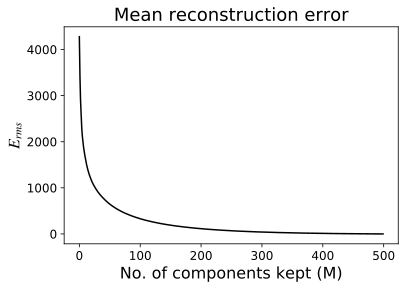

In [5]:
plt.plot(np.arange(eig_values.shape[0]), np.cumsum(eig_values[::-1])[::-1], color = 'black')
beautify_plot({"title":"Mean reconstruction error", "x":"No. of components kept (M)", "y":"$E_{rms}$"})
plt.show()

toggle_code(above = 4)

we again see that here too the dataset is dominated by a relatively small number of components compared to the dimensionality $D$. As with MNIST, we can also visualise the most important components:

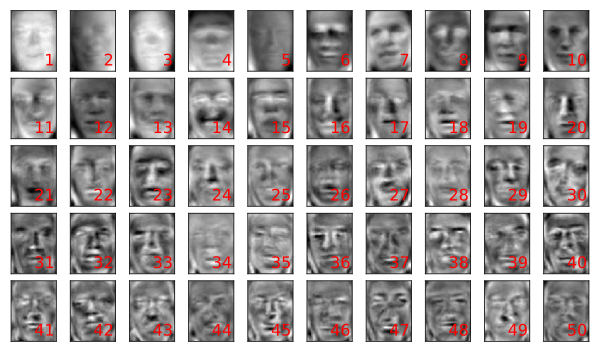

In [8]:
rows, cols = 5, 10
plt.figure(figsize  = (cols, rows))
for i in range(rows*cols):
    
    plt.subplot(rows, cols, i+1)
    plt.imshow(eig_vectors[:, i].reshape(images.shape[1:]), cmap = 'binary')
    plt.text(62, 83, s = i + 1, color = 'red', fontsize = 16,
             horizontalalignment = 'right', verticalalignment = 'bottom')
    remove_axes()
    
plt.tight_layout(w_pad = -10, h_pad = 0)
plt.show()

toggle_code()

We see that the top components are relatively smooth and generic, whereas the less significant ones look like noisy or deformed faces. For our own satisfaction we can wrap this up by showing how some random faces in the dataset can be reconstructed from the $M$ most important components.

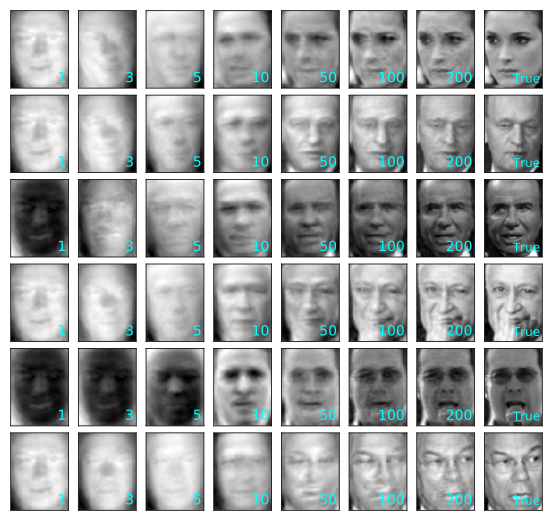

In [7]:
no_components = [1, 3, 5, 10, 50, 100, 200]

plt.figure(figsize = (12, 12))
for j, test_image in enumerate(x[:6]):
    for i, M in enumerate(no_components):
        inner_products = (eig_vectors.T).dot(test_image)

        weights = inner_products[:M]
        vectors = eig_vectors[:, :M]
        reconstructed_img = vectors.dot(weights)

        plt.subplot(10, 8, j*(len(no_components) + 1) + i + 1)
        plt.imshow(-reconstructed_img.reshape(images.shape[1:]), cmap = 'binary')
        plt.text(62, 83, s = M, color = 'cyan', fontsize = 14,
                 horizontalalignment = 'right', verticalalignment = 'bottom')
        remove_axes()

    plt.subplot(10, 8, j*(len(no_components) + 1) + len(no_components) + 1)
    plt.imshow(-test_image.reshape(images.shape[1:]), cmap = 'binary')
    plt.text(62, 83, s = 'True', color = 'cyan', fontsize = 12,
                 horizontalalignment = 'right', verticalalignment = 'bottom')
    remove_axes()

plt.tight_layout(w_pad = -30, h_pad = 0)
plt.show()

toggle_code()

As we saw previously with MNIST, the number of components required until the reconstructed frace resembles the true image ($N \approx 10^2$) is significantly smaller than the dataset dimensionaality $D = 5655$.

Having covered high-dimensional principal component analysis, you should now understand how to compute PCA with high-dimensional data in a computationaly effective way.

In [clustering](../clustering_and_em/clustering_intro.ipynb) we will look at how to seperate unlabelled clustered data into it's distinct groups.